# Analysis of Tournament Matches in Super Smash Bros. Melee
Super Smash Bros. Melee is a child's party game released by Nintendo in 2001. It is a fighting game where players were able to choose from various Nintendo characters and stages to see who could be the last one standing on the stage. Due to the game's unique physics engine and mechanics, players were able to take Melee and turn it into one of the most complex and deep competative games in esports. We're still seeing players push the boundaries of how Melee can be played, even though the game itself has been out for 19 years now. Large scale tournaments, where players from beginners to professionals from around the world gathered for a prize pool, happened regularly before covid. Our goal is to analyze data from one of these major tournaments, specifically Pound 2019, which took place April 19-21st in Laurel, Maryland.

Passionate community members have reverse engineered Melee's code to develop modifications for the game. One of these modifications, called Project Slippi, keeps track of data for two players when they play a match. This data includes most common attacks used in certain positions, most common attack used to kill the opponent, etc. We will be using data from 484 matches from Pound 2019 taken with Slippi.

We chose to analyze data from Melee because we are both very passionate about the game and community and we chose Pound 2019 since we were there and competed in the event.

## How Melee is Played

Melee has 29 total stages but only 6 were deemed "fair" enough for tournament play. In addition, tournament matches are one on one with both players having 4 stocks (or lives). The goal is to take your opponents four stocks before they take yours. The way this is done is by knocking your opponent off the stage to a point where they are unable to make it back, or by hitting the so hard they fly off the sides or top of the screen. In Melee, percent is taken when the player is hit. The more percent the player has, the further they will be knocked back from attacks. It's best to think of percent in Melee as the amount of damage the character has taken and not as actual percent. In tournaments, players will play either best 2 out of 3 matches, or best 3 out of 5 matches in order to progress through brackets.

In [5]:
import pandas as pd
from pathlib import Path
import json
import matplotlib.pyplot as plt
from collections import OrderedDict 

path_str = "C:\\Users\\DanPe\\Desktop\\CMSC320 Final\\CMSC320-Final\\output"
top_tiers = ["FOX", "FALCO", "MARTH", "SHEIK", "FALCON", "PEACH", "JIGGLY"]

def filter_chars(old_dict):
    new_dict = {}
    for c in top_tiers:
        new_dict[c] = old_dict[c]
    return new_dict

# Loading all game data
files = Path(path_str).glob("FALCO-FOX/*.json")
list_of_dfs = []

count = 0
# Load FALCO-FOX matchups
for file in files:
    df = pd.read_json(file)
    count += 1
    list_of_dfs.append(df)

print("Loaded " + str(count) + " matches")

Loaded 375 matches


# Average Kill Percent Each Character / Spread

The goal of building percent on your opponent is to make it easier to take their stock by hitting them off the stage. The amount of percent doesn't matter when a player is offstage, they will still lose the stock once off screen. That being said, each character has a range in percent that they are usually killed at. Different characters have different aspects of them that make them die earlier or live longer than other characters such as fall speed, weight, and recovery options. Here, we want to analyze kill percents for each character.

In [11]:
# Compare the number of neutral openings per kill over different matchups
openings_fox = 0
openings_falco = 0
kills_fox = 0
kills_falco = 0

fox_matches = {}
falco_matches = {}

# Load all matches files
files = Path(path_str).glob("**/*.json")


def get_info(player1, player2):
    return (player1["total_openings"], player2["start_stocks"] + player2["end_stocks"], player1["char_name"])

for file in files:
    df = pd.read_json(file)
    p1 = get_info(df.players[0], df.players[1])
    p2 = get_info(df.players[1], df.players[0])
    
    if p1[2] == "FOX":
        if p2[2] not in fox_matches:
            fox_matches[p2[2]] = {"mean_kill_percent": 0, "kills": 0}
        fox_matches[p2[2]]["mean_kill_percent"] += p1[0]
        fox_matches[p2[2]]["kills"] += p1[1]
    elif p1[2] == "FALCO":
        if p2[2] not in falco_matches:
            falco_matches[p2[2]] = {"mean_kill_percent": 0, "kills": 0}
        falco_matches[p2[2]]["mean_kill_percent"] += p1[1]  
        falco_matches[p2[2]]["kills"] += p1[1]

    if p2[2] == "FOX":
        if p1[2] not in fox_matches:
            fox_matches[p1[2]] = {"mean_kill_percent": 0, "kills": 0}
        fox_matches[p1[2]]["mean_kill_percent"] += p2[1]
        fox_matches[p1[2]]["kills"] += p2[1]
    elif p2[2] == "FALCO":
        if p1[2] not in falco_matches:
            falco_matches[p1[2]] = {"mean_kill_percent": 0, "kills": 0}
        falco_matches[p1[2]]["mean_kill_percent"] += p2[1] 
        falco_matches[p1[2]]["kills"] += p2[1] 


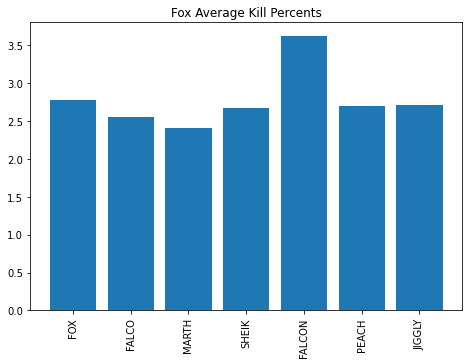

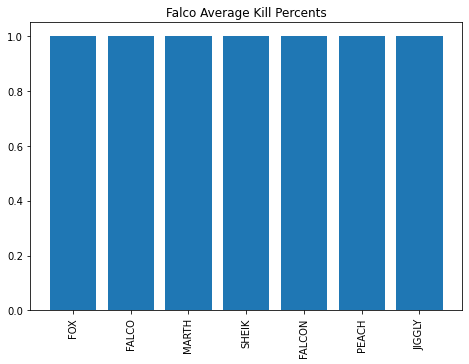

In [12]:
fox_matches = dict(OrderedDict(sorted(fox_matches.items())))
falco_matches = dict(OrderedDict(sorted(falco_matches.items())))

fox_matches = filter_chars(fox_matches)
falco_matches = filter_chars(falco_matches)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
fox_data = [fox_matches[x]["mean_kill_percent"] / fox_matches[x]["kills"] for x in fox_matches.keys()]
ax.bar(fox_matches.keys(),fox_data)
plt.xticks(range(len(fox_matches.keys())), rotation='vertical')
plt.title("Fox Average Kill Percents")

plt.show()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
falco_data = [falco_matches[x]["mean_kill_percent"] / falco_matches[x]["kills"] for x in falco_matches.keys()]
ax.bar(falco_matches.keys(),falco_data)
plt.xticks(range(len(falco_matches.keys())), rotation='vertical')
plt.title("Falco Average Kill Percents")

plt.show()

# Average Openings Per Kill between Fox and Falco
In Melee, the concept of "neutral game" is when neither player is at an inherit advantage from one another. This is when both players are looking for a way to hit one another in order to get a punish. "Punish game" is when one player lands that opening and begins to combo their opponent. The game is constantly changing between the neutral game and punish game as the match progresses. We want to se how many times a Fox player has to win the neutral game compared to how many times a Falco player has to win neutral for in order to get a kill on the other player. This is specific to the Fox v Falco matchup as different matchups can have widly different statistics due to character specific properties. We chose Fox vs Falco since those are the two most common characters in the game.

3.4330110497237567
4.9604938271604935


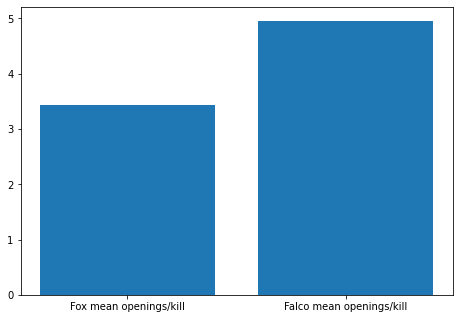

In [74]:
# Count the number of neutral openings
openings_fox = 0
openings_falco = 0
kills_fox = 0
kills_falco = 0

def get_info(player1, player2):
    return (player1["total_openings"], player2["start_stocks"] + player2["end_stocks"], player1["char_name"])

for df in list_of_dfs:
    p1 = get_info(df.players[0], df.players[1])
    p2 = get_info(df.players[1], df.players[0])
    
    if p1[2] == "FOX":
        openings_fox += p1[0]
        kills_fox += p1[1]
    elif p1[2] == "FALCO":
        openings_falco += p1[0]
        kills_falco += p1[1]
    else:
        print("wut")
        break

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
labels = ['Fox mean openings/kill', 'Falco mean openings/kill']
data = [openings_fox/kills_fox, openings_falco/kills_falco]
print(openings_fox/kills_fox)
print(openings_falco/kills_falco)
ax.bar(labels,data)
plt.show()

In [75]:
# Compare the number of neutral openings per kill over different matchups
openings_fox = 0
openings_falco = 0
kills_fox = 0
kills_falco = 0

fox_matches = {}
falco_matches = {}

# Load all matches files
files = Path(path_str).glob("**/*.json")


def get_info(player1, player2):
    return (player1["total_openings"], player2["start_stocks"] + player2["end_stocks"], player1["char_name"])

for file in files:
    df = pd.read_json(file)
    p1 = get_info(df.players[0], df.players[1])
    p2 = get_info(df.players[1], df.players[0])
    
    if p1[2] == "FOX":
        if p2[2] not in fox_matches:
            fox_matches[p2[2]] = {"total_openings": 0, "kills": 0}
        fox_matches[p2[2]]["total_openings"] += p1[0]
        fox_matches[p2[2]]["kills"] += p1[1]
    elif p1[2] == "FALCO":
        if p2[2] not in falco_matches:
            falco_matches[p2[2]] = {"total_openings": 0, "kills": 0}
        falco_matches[p2[2]]["total_openings"] += p1[0]
        falco_matches[p2[2]]["kills"] += p1[1]  


    if p2[2] == "FOX":
        if p1[2] not in fox_matches:
            fox_matches[p1[2]] = {"total_openings": 0, "kills": 0}
        fox_matches[p1[2]]["total_openings"] += p2[0]
        fox_matches[p1[2]]["kills"] += p2[1]
    elif p2[2] == "FALCO":
        if p1[2] not in falco_matches:
            falco_matches[p1[2]] = {"total_openings": 0, "kills": 0}
        falco_matches[p1[2]]["total_openings"] += p2[0]
        falco_matches[p1[2]]["kills"] += p2[1]  

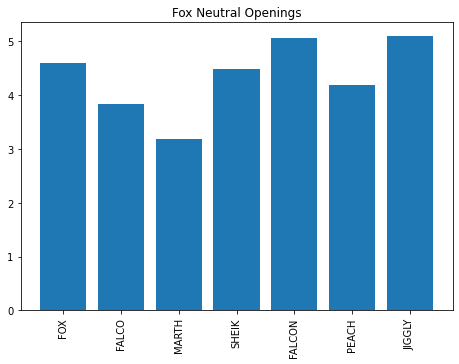

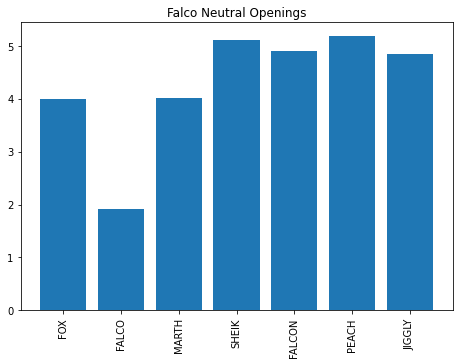

In [76]:
fox_matches = dict(OrderedDict(sorted(fox_matches.items())))
falco_matches = dict(OrderedDict(sorted(falco_matches.items())))

fox_matches = filter_chars(fox_matches)
falco_matches = filter_chars(falco_matches)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
fox_data = [fox_matches[x]["total_openings"] / fox_matches[x]["kills"] for x in fox_matches.keys()]
ax.bar(fox_matches.keys(),fox_data)
plt.xticks(range(len(fox_matches.keys())), rotation='vertical')
plt.title("Fox Neutral Openings")

plt.show()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
falco_data = [falco_matches[x]["total_openings"] / falco_matches[x]["kills"] for x in falco_matches.keys()]
ax.bar(falco_matches.keys(),falco_data)
plt.xticks(range(len(falco_matches.keys())), rotation='vertical')
plt.title("Falco Neutral Openings")

plt.show()

With the information given, we can see that on average, Fox requires less openings per kill than Falco. From that, we can also infer that Fox has a better punish game than Falco since he needs to win the neutral game less in order to take stocks from the opposing Falco. This shows us that Fox has a slightly easier time comboing and killing Falco than Falco does against him. We can also look at how Fox and Falco's punish games are against other characters in the game. The least openings per kill on average was Falco vs Falco matches. This is not surprising as Falco vs Falco is known to be a very fast paced and volatile matchup.

# Shield Pressure

In Melee, it is possible to bring up a bubble like shield around your character. When you block an attack with your shield, your shield becomes smaller, leaving your more vulnerable to getting hit. In shield, each character has a set of options that they can do to punish the opponent for hitting their shield. The question we want to ansswer here is do characters that have bigger shields and better out of shield options shield more often?

In [79]:
# Store the number of matches and total shield damage by each character
match_count = {}
shield_count = {}

# Load all matches files
files = Path(path_str).glob("**/*.json")


def get_info(player1):
    return (player1["shield_damage"], player1["char_name"])

for file in files:
    df = pd.read_json(file)
    p1 = get_info(df.players[0])
    p2 = get_info(df.players[1])
    
    if p2[1] not in match_count:
        match_count[p2[1]] = 0
        
    if p2[1] not in shield_count:
        shield_count[p2[1]] = 0
    
    if p1[1] not in match_count:
        match_count[p1[1]] = 0
        
    if p1[1] not in shield_count:
        shield_count[p1[1]] = 0
    
    shield_count[p2[1]] += p2[0]
    match_count[p2[1]] += 1
    shield_count[p1[1]] += p1[0]
    match_count[p1[1]] += 1

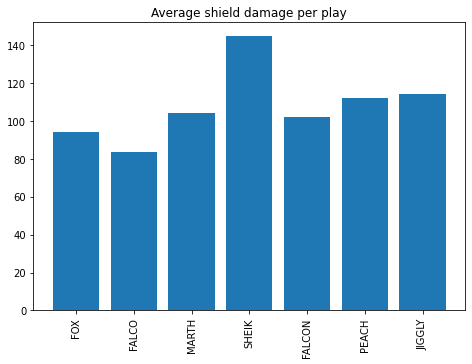

{'FOX': 146305.20141200002,
 'FALCO': 86463.41444700006,
 'MARTH': 78501.57340270012,
 'SHEIK': 46017.38387000001,
 'FALCON': 33532.88862600001,
 'PEACH': 29607.647129000008,
 'JIGGLY': 26020.036275999995}

In [84]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

shield_count = filter_chars(shield_count)

data = []

for char in shield_count.keys():
    data.append(shield_count[char] / match_count[char])

ax.bar(shield_count.keys(),data)
plt.xticks(range(len(shield_count.keys())), rotation='vertical')
plt.title("Average shield damage per play")

plt.show()

The data shows us that the character that takes the most shield damage is Sheik and the character that takes the least shield damage is Falco. This becomes interesting when you consider how both of the characters work in the game. Sheik has the biggest shield and the best out of shild options in the game, so it would make sense that the data would show that Sheik polayers would shield attacks the most. On the contrary, Falcos shield and out of shield options aren't the best. Falco is usually the character to take control of the match and lock down their opponent in shield, which is most likely why Falco players shield the least.

# Average GALINT

When the player grabs the ledge of the stage, they are given 30 frames (or half a second) of invulnerability. By performing a technique known as a ledge dash, you are able to quickly let go of ledge and get on the stage. The term GALINT stands for grounded action ledge intangibility. We want to see the average GALINT for the top tier characters. Each character has a different amount of maximum GALINT: Fox-15, Falco-14, Marth-4, Sheik-11, Jigglypuff-9, Captain Falcon-10, Peach-0

In [88]:
# Store the number of matches and total shield damage by each character
match_count = {}
galint_count = {}

# Load all matches files
files = Path(path_str).glob("**/*.json")


def get_info(player1):
    return (player1["mean_galint"], player1["char_name"])

for file in files:
    df = pd.read_json(file)
    p1 = get_info(df.players[0])
    p2 = get_info(df.players[1])
    
    if p2[1] not in match_count:
        match_count[p2[1]] = 0
        
    if p2[1] not in galint_count:
        galint_count[p2[1]] = 0
    
    if p1[1] not in match_count:
        match_count[p1[1]] = 0
        
    if p1[1] not in galint_count:
        galint_count[p1[1]] = 0
    
    galint_count[p2[1]] += p2[0]
    match_count[p2[1]] += 1
    galint_count[p1[1]] += p1[0]
    match_count[p1[1]] += 1

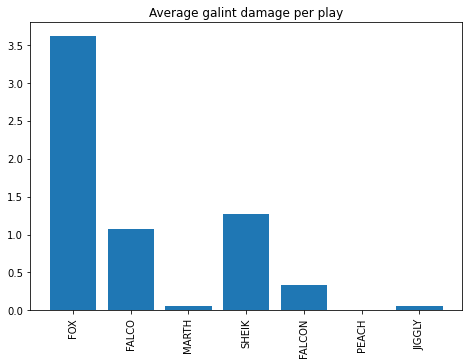

In [91]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

galint_count = filter_chars(galint_count)

data = []

for char in galint_count.keys():
    data.append(galint_count[char] / match_count[char])

ax.bar(galint_count.keys(),data)
plt.xticks(range(len(galint_count.keys())), rotation='vertical')
plt.title("Average galint damage per play")

plt.show()

We can see that the Fox player have the best average GALINT. This makes sense because Fox has the best ledgedash in the game. 